<blockquote>
    
<b>Глеб, привет!</b>
    
Меня зовут Макаев Андрей, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты" Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница

Можешь оформлять их так:

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
 </div>
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓
</blockquote>

Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Здорово что ты вставил описание проекта , это поможет читателю и тебе самому (например, через полгода) быстрее понять контекст, того что ты делал =) Еще стоит добавить план/содержание, он тоже полезен
</div>

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import statistics as stat

pd.options.display.float_format = '{:,.2f}'.format

Я буду в дальнейшем последовательно открывать файлы с данными, изучать их и подготавливать.

## Подготовьте данные

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.info()
data_calls.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
162196,1399_55,2018-12-12,10.78,1399
37064,1093_342,2018-11-16,18.48,1093
85235,1213_281,2018-11-29,0.00,1213
61649,1155_457,2018-09-13,23.07,1155
180725,1452_99,2018-10-27,0.68,1452
167544,1412_461,2018-06-05,14.93,1412
104207,1267_199,2018-08-16,10.37,1267
98365,1250_285,2018-11-14,13.99,1250
31505,1078_849,2018-12-01,1.82,1078
125686,1323_209,2018-12-30,0.00,1323


<div class="alert alert-info"> Округлим минуты в большую сторону
    
 </div>

In [3]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
data_calls['duration'] = data_calls['duration'].astype('int')

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Для округления ты использовал функцию np.ceil, всё верно, но, её лучше просто применять к столбцу, без метода apply. Так она будет быстрее выполняться - np.ceil применится сразу ко всему столбцу, apply же применяет её построчно. Ну и твой код будет короче =)

Представляется необходимым перевести данные в столбце call_date в формат datetime, а данные в столбце user_id в формат str (так как это идентификатор и математические операции с ним не проводятся).

In [4]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'],
                                         format='%Y-%m-%d'
                                        )
data_calls['user_id'] = data_calls['user_id'].astype('str')
data_calls.info()
data_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.2+ MB


,duration
count,"202,607.00"
mean,7.16
std,5.96
min,0.00
25%,2.00
50%,6.00
75%,11.00
max,38.00


In [5]:
data_calls['user_id'].nunique()

492

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Здорово, что ты указываешь формат даты при переводе столбца из текста в дату, это хорошая привычка, может спасти от неочевидных ошибок при переводе

В датасете по звонкам представлена информация о 492 пользователях.

In [6]:
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.info()
data_internet.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
10752,10752,1036_182,90.86,2018-11-10,1036
75908,75908,1255_104,978.69,2018-03-10,1255
14565,14565,1051_179,0.00,2018-07-01,1051
113690,113690,1384_400,610.96,2018-12-25,1384
97448,97448,1328_5,772.74,2018-12-27,1328
114552,114552,1386_5,106.45,2018-10-06,1386
33538,33538,1118_155,362.25,2018-11-19,1118
118548,118548,1400_259,703.18,2018-10-16,1400
30144,30144,1105_212,299.22,2018-12-26,1105
110674,110674,1375_390,784.47,2018-11-04,1375


In [7]:
data_internet['session_date'] = pd.to_datetime(
                                                data_internet['session_date'],
                                                format='%Y-%m-%d'
                                                )

data_internet['user_id'] = data_internet['user_id'].astype('str')

data_internet.info()
data_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used
count,"149,396.00","149,396.00"
mean,"74,697.50",370.19
std,"43,127.05",278.30
min,0.00,0.00
25%,"37,348.75",138.19
50%,"74,697.50",348.01
75%,"112,046.25",559.55
max,"149,395.00","1,724.83"


Имеются случаи с нулевым потреблением трафика. 

In [8]:
len(data_internet[data_internet['mb_used'] == 0])

19598

Интересно посмотреть на нулевые значения в разрезе тарифов

In [9]:
data_users = pd.read_csv('/datasets/users.csv')
data_users = data_users[['user_id', 'tariff']]

data_users['user_id'] = data_users['user_id'].astype('str')
data_internet_new = data_internet.join(data_users.set_index('user_id'), 
                                       on='user_id')

In [10]:
print(
    data_internet_new.pivot_table(index='tariff', 
                                  values='id', 
                                  aggfunc='count')
)

data_internet_new[data_internet_new['mb_used'] == 0].pivot_table(index='tariff', 
                                                                 values='id',
                                                                 aggfunc='count')

            id
tariff        
smart   111539
ultra    37857


,id
tariff,
smart,17823
ultra,1775


Пропусков значительно больше в тарифе smart, однако в датасете и самих строк с тарифом смарт больше. Заполнение по медиане или по среднему такого количества пропусков может исказить выборку, поэтому считаю необходимым удалить строки с пропусками.

In [11]:
data_internet = data_internet[data_internet['mb_used'] > 0]
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    129798 non-null  int64         
 1   id            129798 non-null  object        
 2   mb_used       129798 non-null  float64       
 3   session_date  129798 non-null  datetime64[ns]
 4   user_id       129798 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.9+ MB


In [12]:
print(data_internet.duplicated().sum())
data_internet.isna().sum()

0


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Чтобы не было колонки Unnamed: 0, нужно задать параметр index_col = 0 при чтении файла

</div>


Дубликатов и пропусков нет.

In [13]:
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.info()
data_messages.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
67240,1285_428,2018-07-25,1285
62120,1272_273,2018-10-24,1272
38794,1167_100,2018-12-17,1167
72230,1304_26,2018-11-05,1304
19818,1088_108,2018-06-06,1088
12820,1054_376,2018-06-06,1054
114539,1465_431,2018-11-29,1465
7314,1030_225,2018-08-17,1030
32317,1144_456,2018-11-25,1144
97441,1400_13,2018-08-25,1400


In [14]:
data_messages['message_date'] = pd.to_datetime(
                                                data_messages['message_date'],
                                                format='%Y-%m-%d'
                                                )
data_messages['user_id'] = data_messages['user_id'].astype('str')
print(data_messages.duplicated().sum())
print(data_messages.isna().sum())


0
id              0
message_date    0
user_id         0
dtype: int64


Пропусков и дубликатов нет.

In [15]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs.info()
data_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Проблем с датасетом нет

In [16]:
data_users = pd.read_csv('/datasets/users.csv')
data_users.info()
data_users.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
67,1067,45,NaN,Москва,Юзефа,Абашкина,2018-04-09,smart
159,1159,64,NaN,Красноярск,Эльга,Аничкина,2018-11-28,smart
183,1183,20,NaN,Владивосток,Снежана,Озерова,2018-07-12,smart
151,1151,39,NaN,Пенза,Лариса,Молчанова,2018-09-15,ultra
421,1421,30,NaN,Калининград,Гайдар,Александрович,2018-02-22,smart
209,1209,27,NaN,Омск,Альбин,Сорокин,2018-06-02,smart
470,1470,23,NaN,Новокузнецк,Эллада,Лосева,2018-10-19,smart
275,1275,48,NaN,Москва,Семён,Елизаров,2018-04-24,smart
354,1354,56,NaN,Сочи,Лола,Кулагина,2018-08-19,smart
357,1357,37,NaN,Томск,Касьян,Ермилов,2018-09-02,smart


In [17]:
for i in ['churn_date', 'reg_date']: 
    data_users[i] = pd.to_datetime(
                                    data_users[i],
                                    format='%Y-%m-%d'
                                    )
    
data_users['user_id'] = data_users['user_id'].astype('str')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


In [18]:
print(
    data_users.duplicated().sum()
    )

print(
    data_users.isna().sum()
    )

0
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


In [19]:
data_users['user_id'].duplicated().sum()

0

In [20]:
print(
    sorted(data_users['age'].unique()
          )
    )

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


Возраста в пределах нормы.

In [21]:
print(
    sorted(data_users['city'].unique()
          )
    )

['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород', 'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград', 'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск', 'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва', 'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород', 'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск', 'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск', 'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара', 'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск', 'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь', 'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск', 'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец', 'Чита', 'Якутск', 'Ярославль']


Неявных дубликатов нет.

In [22]:
data_users_name = data_users[['first_name', 'last_name']]
data_users_name['first_name'] = data_users_name['first_name'].str.lower()
data_users_name['last_name'] = data_users_name['last_name'].str.lower()
print(data_users_name.duplicated().sum())

0


/tmp/ipykernel_86/756338070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_users_name['first_name'] = data_users_name['first_name'].str.lower()
/tmp/ipykernel_86/756338070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_users_name['last_name'] = data_users_name['last_name'].str.lower()


Нет совпадений имен и фамилий одновременно. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
    
Данные проверены, всё окей.
    
Но, надо не забывать про округление данных из задания, при подготовке данных нужно было округлить звонки:
    
    Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

<div class="alert alert-info"> Данные по звонкам округлил 
    
 </div>

## Проанализируйте данные

Посчитайте для каждого пользователя:

    количество сделанных звонков и израсходованных минут разговора по месяцам;
    количество отправленных сообщений по месяцам;
    объем израсходованного интернет-трафика по месяцам;
    помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Установим для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. Для этого в том числе необходимо выделить месяц и добавить в дальнейшем информацию о тарифе, чтобы посчитать расходы клиентов в зависемости от тарифа.

In [23]:
data_calls['month'] = data_calls['call_date'].dt.month
data_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>
    
На этих данных такой перевод в месяц можно делать, но, на будущее, если данные будут за большее время, то апрель 2018 и апрель 2019 будут под одной цифрой 4. В таких случаях можно дату переводить в первый день месяца с помощью df['дата'].astype('datetime64[M]')

In [24]:
data_users_new = data_users[['user_id', 'tariff']]
data_calls = data_calls.join(data_users_new.set_index('user_id'), 
                             on='user_id')

In [25]:
data_calls

,id,call_date,duration,user_id,month,tariff
0,1000_0,2018-07-25,0,1000,7,ultra
1,1000_1,2018-08-17,0,1000,8,ultra
2,1000_2,2018-06-11,3,1000,6,ultra
3,1000_3,2018-09-21,14,1000,9,ultra
4,1000_4,2018-12-15,6,1000,12,ultra
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12,smart
202603,1499_216,2018-10-18,19,1499,10,smart
202604,1499_217,2018-11-10,11,1499,11,smart
202605,1499_218,2018-10-06,5,1499,10,smart


Количество сделанных звонков для каждого пользователя по месяцам 

In [26]:
pivot_calls_num = data_calls.pivot_table(
                        index='user_id', 
                        columns='month', 
                        values='id',
                        aggfunc={'id':'count'}
                        ).reset_index()
pivot_calls_num

month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,NaN,NaN,NaN,NaN,22.00,43.00,47.00,52.00,58.00,57.00,43.00,46.00
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.00,63.00
2,1002,NaN,NaN,NaN,NaN,NaN,15.00,26.00,42.00,36.00,33.00,32.00,33.00
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.00,134.00,108.00,115.00,108.00
4,1004,NaN,NaN,NaN,NaN,9.00,31.00,22.00,19.00,26.00,29.00,19.00,21.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,112.00,152.00,129.00,155.00
488,1496,7.00,77.00,79.00,67.00,63.00,74.00,73.00,88.00,68.00,72.00,80.00,80.00
489,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.00,64.00,71.00
490,1498,NaN,NaN,NaN,NaN,NaN,NaN,23.00,57.00,59.00,41.00,NaN,NaN


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>
    
Ты сделал правильную сводную таблицу, но с ней очень неудобно в дальнейшем работать. Лучше чтобы в одной строке была запись о звонках одного пользователя в одном месяце. Это просто сделать просто передав в index = [айди, месяц]. Также можно в aggfunc передать две функции для аггрегации

Количество израсходованных минут разговора по месяцам

In [27]:
pivot_calls_duration = data_calls.pivot_table(
                        index=['user_id', 'tariff'], 
                        columns='month', 
                        values='duration',
                        aggfunc={'duration':'sum'}
                        ).reset_index()

In [28]:
pivot_calls_duration

month,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,159.00,172.00,340.00,408.00,466.00,350.00,338.00,333.00
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.00,414.00
2,1002,smart,NaN,NaN,NaN,NaN,NaN,117.00,214.00,289.00,206.00,212.00,243.00,236.00
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.00,961.00,855.00,824.00,802.00
4,1004,ultra,NaN,NaN,NaN,NaN,35.00,171.00,135.00,137.00,117.00,145.00,117.00,130.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1495,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.00,813.00,"1,030.00",954.00,"1,031.00"
488,1496,smart,48.00,594.00,557.00,521.00,484.00,555.00,582.00,527.00,486.00,450.00,662.00,518.00
489,1497,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.00,371.00,545.00
490,1498,smart,NaN,NaN,NaN,NaN,NaN,NaN,175.00,400.00,471.00,247.00,NaN,NaN


Количество сообщений по месяцам

In [29]:
data_messages = data_messages.join(data_users_new.set_index('user_id'), 
                                   on='user_id')

In [30]:
data_messages['month'] = data_messages['message_date'].dt.month
data_messages.sample(5)

,id,message_date,user_id,tariff,month
37812,1165_166,2018-11-26,1165,ultra,11
100520,1411_356,2018-10-25,1411,smart,10
17698,1076_847,2018-07-14,1076,smart,7
34461,1149_273,2018-06-08,1149,smart,6
59712,1262_203,2018-04-30,1262,smart,4


In [31]:
pivot_messages = data_messages.pivot_table(index=['user_id', 'tariff'],
                                           columns='month',
                                           values='id',
                                           aggfunc='count'
                                          ).reset_index()
pivot_messages

month,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,22.00,60.00,75.00,81.00,57.00,73.00,58.00,70.00
1,1002,smart,NaN,NaN,NaN,NaN,NaN,4.00,11.00,13.00,4.00,10.00,16.00,12.00
2,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.00,91.00,83.00,94.00,75.00
3,1004,ultra,NaN,NaN,NaN,NaN,95.00,134.00,181.00,151.00,146.00,165.00,158.00,162.00
4,1005,smart,7.00,38.00,56.00,41.00,42.00,47.00,56.00,64.00,52.00,44.00,51.00,54.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1495,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.00,82.00,82.00,79.00,84.00
422,1496,smart,9.00,45.00,46.00,49.00,40.00,35.00,42.00,41.00,29.00,35.00,46.00,51.00
423,1497,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,14.00,17.00
424,1498,smart,NaN,NaN,NaN,NaN,NaN,NaN,20.00,62.00,44.00,42.00,NaN,NaN


объем израсходованного интернет-трафика по месяцам

In [32]:
data_internet = data_internet.join(data_users_new.set_index('user_id'), 
                                   on='user_id')

In [33]:
data_internet['month'] = data_internet['session_date'].dt.month
data_internet.sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id,tariff,month
46098,46098,1157_610,591.55,2018-08-18,1157,smart,8
18778,18778,1064_497,154.24,2018-08-23,1064,smart,8
16154,16154,1055_612,331.84,2018-10-07,1055,smart,10
15941,15941,1055_399,419.74,2018-09-30,1055,smart,9
78811,78811,1264_430,99.61,2018-05-07,1264,smart,5


In [34]:
pivot_internet = data_internet.pivot_table(index=['user_id', 'tariff'],
                                           columns='month',
                                           values='mb_used',
                                           aggfunc='sum'
                                          ).reset_index()
pivot_internet

month,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,"2,253.49","23,233.77","14,003.64","14,055.93","14,568.91","14,702.49","14,756.47","9,817.61"
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"18,429.34","14,036.66"
2,1002,smart,NaN,NaN,NaN,NaN,NaN,"10,856.82","17,580.10","20,319.26","16,691.08","13,888.25","18,587.28","18,113.73"
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,565.21","12,468.87","14,768.14","11,356.89","10,121.53"
4,1004,ultra,NaN,NaN,NaN,NaN,"13,403.98","17,600.02","22,229.58","28,584.37","15,109.03","18,475.44","15,616.02","18,021.04"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1495,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,614.07","33,067.62","29,363.00","38,939.11","23,426.76"
493,1496,smart,"3,762.73","28,489.67","24,959.00","21,074.67","23,709.75","20,134.31","24,364.76","23,530.03","26,934.65","28,183.17","25,063.40","20,736.15"
494,1497,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"11,500.29","14,156.08","19,918.60"
495,1498,smart,NaN,NaN,NaN,NaN,NaN,NaN,"7,476.24","24,235.21","22,134.41","20,579.36",NaN,NaN


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
    
Вспомним задание

    Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. 

<div class="alert alert-info"> я далее округлил гб в большую сторону

Считаем месячную прибыль по каждому виду трафика.

In [35]:
df_calls_profit = pivot_calls_duration.copy()

Для того, что посчитать выручку от звонков необходимо в зависемости от тарифа отнять бесплатные минуты.

In [36]:
df_calls_profit.loc[df_calls_profit.tariff == 'smart',
                    range(1, 13)] -= 500

df_calls_profit.loc[df_calls_profit.tariff == 'ultra',
                    range(1, 13)] -= 3000

Полученные отрицательные значения обнулим, чтобы они не влиляли на результат и заменим значения NaN нулями.

In [37]:
for i in range(1, 13):
    df_calls_profit.loc[df_calls_profit[i] < 0, i] = 0
df_calls_profit = df_calls_profit.fillna(0)

Полученный результат умножим в зависемости от тарифа. Так как в тарифе ultra плата за 1 минуту 1 рубль, то умножать не будем.

In [38]:
df_calls_profit.loc[df_calls_profit.tariff == 'smart', range(1, 13)] *= 3

In [39]:
df_calls_profit

month,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1001,smart,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1002,smart,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1003,ultra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1004,ultra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1495,ultra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
488,1496,smart,0.00,282.00,171.00,63.00,0.00,165.00,246.00,81.00,0.00,0.00,486.00,54.00
489,1497,smart,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,135.00
490,1498,smart,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Посчитаем месячную прибыль за отправленные смс сообщения.

In [40]:
messages_profit = pivot_messages.copy()

In [41]:
messages_profit.loc[messages_profit.tariff == 'ultra', range(1, 13)] -= 1000
messages_profit.loc[messages_profit.tariff == 'smart', range(1, 13)] -= 50

In [42]:
for i in range(1, 13): 
    messages_profit.loc[messages_profit[i] < 0, i] = 0
messages_profit = messages_profit.fillna(0)

In [43]:
messages_profit.loc[messages_profit.tariff == 'smart', range(1, 13)] *= 3

In [44]:
messages_profit

month,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1002,smart,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1003,ultra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1004,ultra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1005,smart,0.00,0.00,18.00,0.00,0.00,0.00,18.00,42.00,6.00,0.00,3.00,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1495,ultra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
422,1496,smart,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
423,1497,smart,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
424,1498,smart,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.00,0.00,0.00,0.00,0.00


Посчитаем месячную прибыль за интернет.

In [45]:
internet_profit = pivot_internet.copy()

In [46]:
internet_profit.loc[internet_profit.tariff == 'smart', range(1, 13)] -= 15360
internet_profit.loc[internet_profit.tariff == 'ultra', range(1, 13)] -= 30720

In [47]:
for i in range(1, 13): 
    internet_profit.loc[internet_profit[i] < 0, i] = 0
internet_profit = internet_profit.fillna(0)

In [48]:
internet_profit.loc[:, range(1, 13)] /= 1024

<div class="alert alert-info"> Здесь округлил гб в большую сторону

In [49]:
internet_profit.loc[:, range(1, 13)] = internet_profit.loc[:, range(1, 13)].apply(np.ceil)
internet_profit.loc[:, range(1, 13)] = internet_profit.loc[:, range(1, 13)].astype('int')

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [50]:
internet_profit.loc[internet_profit.tariff == 'smart', range(1, 13)] *= 200
internet_profit.loc[internet_profit.tariff == 'ultra', range(1, 13)] *= 150

Осуществим подсчет абонеской платы помесячно.

In [51]:
data_users['month_churn'] = data_users['churn_date'].dt.month
data_users['month_reg'] = data_users['reg_date'].dt.month

In [52]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn,month_reg
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaN,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,NaN,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,5
...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,NaN,8
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,NaN,1
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,NaN,10
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.00,7


Выделем отдельный датасет, в который будет по месячна записана информация об абоненской плате. И на основании которого в дальнейшем будет создан датасет, в котором будут учтены все расходы клиентов.

In [53]:
df_month_fee = data_users.copy()
df_month_fee = df_month_fee[['user_id', 'tariff', 'age', 'city']]
df_month_fee[list(range(1, 13))] = 0

In [54]:
df_month_fee

,user_id,tariff,age,city,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,52,Краснодар,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,smart,41,Москва,0,0,0,0,0,0,0,0,0,0,0,0
2,1002,smart,59,Стерлитамак,0,0,0,0,0,0,0,0,0,0,0,0
3,1003,ultra,23,Москва,0,0,0,0,0,0,0,0,0,0,0,0
4,1004,ultra,68,Новокузнецк,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,65,Иркутск,0,0,0,0,0,0,0,0,0,0,0,0
496,1496,smart,36,Вологда,0,0,0,0,0,0,0,0,0,0,0,0
497,1497,smart,32,Челябинск,0,0,0,0,0,0,0,0,0,0,0,0
498,1498,smart,68,Владикавказ,0,0,0,0,0,0,0,0,0,0,0,0


В колонке month_churn NaN заменим на 12 (это пригодится в дальнейшем)

In [55]:
data_users_new = data_users.copy()
data_users_new['month_churn'] = data_users_new['month_churn'].fillna(12)
data_users_new['month_churn'] = data_users_new['month_churn'].astype('int')
data_users_new

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn,month_reg
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,12,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,12,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,12,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,12,5
...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,12,8
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,12,1
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,12,10
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,7


Зачислим абоненскую плату по месяцам в зависимости от тарифа

Начисление будет осуществлятся в зависемости от тарифа и месяцев его использования.

In [56]:
for i in data_users_new['user_id'].unique():
    date_start = data_users_new.query('user_id in @i')['month_reg'].item()
    date_stop = data_users_new.query('user_id in @i')['month_churn'].item()
        
    df_month_fee.loc[(df_month_fee['user_id'] == i) & (df_month_fee['tariff'] == 'ultra'), 
                     range(date_start, int(date_stop) + 1)] = 1950
    
    df_month_fee.loc[(df_month_fee['user_id'] == i) & (df_month_fee['tariff'] == 'smart'), 
                     range(date_start, int(date_stop) + 1)] = 500 

In [57]:
df_month_fee

,user_id,tariff,age,city,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,52,Краснодар,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
1,1001,smart,41,Москва,0,0,0,0,0,0,0,0,0,0,500,500
2,1002,smart,59,Стерлитамак,0,0,0,0,0,500,500,500,500,500,500,500
3,1003,ultra,23,Москва,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
4,1004,ultra,68,Новокузнецк,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,65,Иркутск,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
496,1496,smart,36,Вологда,500,500,500,500,500,500,500,500,500,500,500,500
497,1497,smart,32,Челябинск,0,0,0,0,0,0,0,0,0,500,500,500
498,1498,smart,68,Владикавказ,0,0,0,0,0,0,500,500,500,500,0,0


Посчитаем помесячную вырочку с каждого пользователя за все предоставленные услуги.

Проидексируем датасеты по user_id

In [58]:
df_calls_profit = df_calls_profit.fillna(0)
df_calls_profit = df_calls_profit.set_index('user_id')
df_calls_profit.columns.name = 0

messages_profit = messages_profit.fillna(0)
messages_profit = messages_profit.set_index('user_id')
messages_profit.columns.name = 0

internet_profit = internet_profit.fillna(0)
internet_profit = internet_profit.set_index('user_id')
internet_profit.columns.name = 0

df_month_fee = df_month_fee.set_index('user_id')
df_month_fee.columns.name = 0

Сформируем датасет со всеми пользователями, который в дальнейшем будет содержать информацию о суммарных расходах клиентов.

In [59]:
df_total_fee = df_month_fee.copy()

In [60]:
df_total_fee.loc[:, 1:12] = 0

In [61]:
df_total_fee

,tariff,age,city,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,,,,
1000,ultra,52,Краснодар,0,0,0,0,0,0,0,0,0,0,0,0
1001,smart,41,Москва,0,0,0,0,0,0,0,0,0,0,0,0
1002,smart,59,Стерлитамак,0,0,0,0,0,0,0,0,0,0,0,0
1003,ultra,23,Москва,0,0,0,0,0,0,0,0,0,0,0,0
1004,ultra,68,Новокузнецк,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,65,Иркутск,0,0,0,0,0,0,0,0,0,0,0,0
1496,smart,36,Вологда,0,0,0,0,0,0,0,0,0,0,0,0
1497,smart,32,Челябинск,0,0,0,0,0,0,0,0,0,0,0,0


Создадим функцию, которая будет складывать расходы по клиентам и месяцам.

In [62]:
def func(df, df_1):
    for i in list(df_1.index):
        for col in range(1, 13):
            df.loc[i, col] +=  df_1.loc[i, col]

In [63]:
func(df_total_fee, df_month_fee)

In [64]:
func(df_total_fee, df_calls_profit)

In [65]:
func(df_total_fee, internet_profit)

In [66]:
func(df_total_fee, messages_profit)

In [67]:
df_total_fee

,tariff,age,city,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,,,,
1000,ultra,52,Краснодар,0.00,0.00,0.00,0.00,"1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00"
1001,smart,41,Москва,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100.00",500.00
1002,smart,59,Стерлитамак,0.00,0.00,0.00,0.00,0.00,500.00,"1,100.00","1,500.00",900.00,500.00,"1,300.00","1,100.00"
1003,ultra,23,Москва,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,950.00","1,950.00","1,950.00","1,950.00","1,950.00"
1004,ultra,68,Новокузнецк,0.00,0.00,0.00,0.00,"1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,65,Иркутск,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,950.00","2,400.00","1,950.00","3,300.00","1,950.00"
1496,smart,36,Вологда,500.00,"3,382.00","2,671.00","1,763.00","2,300.00","1,665.00","2,546.00","2,181.00","2,900.00","3,100.00","2,986.00","1,757.00"
1497,smart,32,Челябинск,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500.00,500.00,"1,635.00"


Проведем проверку

In [68]:
print(df_total_fee.loc[:, 1:12].sum().sum())

4805451.0


In [69]:
total_sum = 0
for i in [df_calls_profit, messages_profit, internet_profit, df_month_fee]: 
    total_sum += i.loc[:, 1:12].sum().sum()
total_sum

4805451.0

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>
    
Вроде бы ты всё сделал правильно (кроме округлений=)), но такой способ очень трудозатратный, тяжело проверяемый, и дальше с такой таблицей очень сложно работать.
    
Другой способ, более простой - сделать таблицы в такой форме:
    
| user_id | month | calls_duration | messages | revenue |
|---------|-------|----------------|----------|---------|
| 1       | 5     | 10             | 10       | 550     |
| 1       | 6     | 15             | 20       | 550     |
| 1       | 7     | 11             | 23       | 550     |
    
С такой формой гораздо проще работать, объединять, считать выручку, и потом анализировать.
    
Предлагаю всё-таки сделать и так, и сравнить свои трудозатраты
    
    

<div class="alert alert-info"> Сейчас попробуем:
    
 </div>

In [70]:
new_pivot_calls = data_calls.pivot_table(index=['user_id', 'month', 'tariff'],
                                         values='duration',
                                         aggfunc='sum'
                                        )


In [71]:
new_pivot_messages = data_messages.pivot_table(index=['user_id', 'month', 'tariff'],
                                         values='message_date',
                                         aggfunc='count'
                                              )

new_pivot_messages.columns = ['messages']

In [72]:
new_pivot_internet = data_internet.pivot_table(index=['user_id', 'month', 'tariff'],
                                         values='mb_used',
                                         aggfunc='sum'
                                              )


In [73]:
total = new_pivot_calls.join([new_pivot_messages, new_pivot_internet], how='outer').reset_index()

In [74]:
total['messages'].sum()

123036.0

In [75]:
new_pivot_messages['messages'].sum()

123036

In [76]:
def month_board(x):
    if x['tariff'] == 'ultra': 
        return 1950
    else: 
        return 500

In [77]:
total['month_board'] = total.apply(month_board, axis=1)

In [78]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [79]:
total.loc[total.tariff == 'ultra', 'duration'] -= 3000
total.loc[total.tariff == 'smart', 'duration'] -= 500
total.loc[total.duration < 0, 'duration'] = 0
total.loc[total.tariff == 'smart', 'duration'] *= 3

In [80]:
total.loc[total.tariff == 'ultra', 'messages'] -= 1000
total.loc[total.tariff == 'smart', 'messages'] -= 50
total.loc[total.messages < 0, 'messages'] = 0
total.loc[total.tariff == 'smart', 'messages'] *= 3

In [81]:
total.loc[total.tariff == 'ultra', 'mb_used'] -= 30720
total.loc[total.tariff == 'smart', 'mb_used'] -= 15360
total.loc[total.mb_used < 0, 'mb_used'] = 0

total['mb_used'] /= 1024
total['mb_used'] = total['mb_used'].apply(np.ceil)

total.loc[total.tariff == 'ultra', 'mb_used'] *= 150
total.loc[total.tariff == 'smart', 'mb_used'] *= 200


In [82]:
total['revenue'] = total['duration'] + total['messages'] + total['mb_used'] + total['month_board']

<div class="alert alert-info"> Да, это оказалось раз в 5 проще и быстрее (и это даже не привеулечение). Спасибо за замечание.
    
 </div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡-2:</b> 
    
Здорово что ты попробовал!

Но, при обьединении всегда полезно проверять корректность объединения. Например, тут можно было проверить что сумма отправленных сообщений в total совпадает с new_pivot_messages.
    
Сейчас ты теряешь данные, нужно указать в методе джойн как ты хочешь объединять. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
    
В параметре how нужно указать вид объединения, который берет все данные и из "левой" таблицы, и из "правой". Также стоит указывать по каким параметрам ты объединяешь с помощью on = [айди, месяц]
    
Проект ты сделал, но давай тут тоже исправишь ошибку и потом я приму проект? Стоит разобраться с объединением данных, это один из самых необходимых навыков=)

<div class="alert alert-info"> Исправил, путем добавления how='outer'. Почему-то был уверен, что я его добовлял...
    
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера-3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Теперь всё верно

Результаты совпадают

In [83]:
#Код ревьювера для проверки
df_total_fee.melt(id_vars=['tariff', 'age', 'city'], value_vars=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) \
    .loc[lambda x: x['value']!=0] \
    .rename(columns={0:'month', 'value':'revenue'})

,tariff,age,city,month,revenue
5,smart,67,Набережные Челны,1,500.00
32,smart,31,Ульяновск,1,"2,300.00"
45,smart,48,Улан-Удэ,1,500.00
55,smart,39,Казань,1,"1,053.00"
71,smart,20,Омск,1,700.00
...,...,...,...,...,...
5994,smart,62,Омск,12,"1,100.00"
5995,ultra,65,Иркутск,12,"1,950.00"
5996,smart,36,Вологда,12,"1,757.00"
5997,smart,32,Челябинск,12,"1,635.00"


## Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Создадим функцию, которая принимает датасет, а возвращает список значений датасета без NAN. Нули необходимо оставить так как клиент мог не пользоваться в определенном месяце какой-либо услугой.

In [84]:
def make_list(df):
    list_value = []
    df_copy = df.copy()
    for i in df_copy.columns:
        list_1 = list(df_copy.loc[:, i])
        for k in range(0, len(list_1)):
            if list_1[k] > -1:
                list_value.append(list_1[k])
    return list_value
                

In [85]:
def stat_info(data):
    print(f"Медиана {stat.median(data)}")
    print(f"Среднее {stat.mean(data)}")
    print(f"Дисперсия {np.var(data)}")
    print(f"Стандартное отклонение {np.sqrt(np.var(data))}")
    sns.displot(data=data, 
            kde=True)
    plt.show()

In [86]:
minute_smart = make_list(pivot_calls_duration.query('tariff=="smart"').loc[:, 1:12])

In [87]:
minute_ultra = make_list(pivot_calls_duration.query('tariff=="ultra"').loc[:, 1:12])

Медиана 423.0
Среднее 419.0629779577148
Дисперсия 35828.06530953033
Стандартное отклонение 189.2830296395594


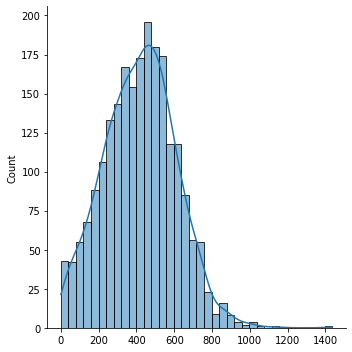

In [88]:
stat_info(minute_smart)

Пользователи тарифа Smart чаще всего тратят 400 минут мобильной связи в месяц. Среднее составляет 395, дисперсия 32038, стандартное отклонение 178.

Медиана 528.0
Среднее 545.4511041009464
Дисперсия 94104.36117385981
Стандартное отклонение 306.7643414314314


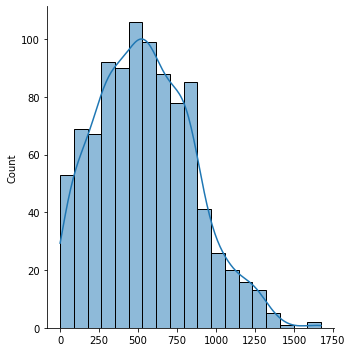

In [89]:
stat_info(minute_ultra)

Пользователи тарифа Ultra чаще всего тратят 500 минут мобильной связи в месяц. Среднее составляет 514, дисперсия 83914, стандартное отклонение 289.

In [90]:
messages_smart = make_list(pivot_messages.query('tariff=="smart"').loc[:, 1:12])

In [91]:
messages_ultra = make_list(pivot_messages.query('tariff=="ultra"').loc[:, 1:12])

Медиана 34.0
Среднее 38.71644120707596
Дисперсия 717.220843110227
Стандартное отклонение 26.780979129042816


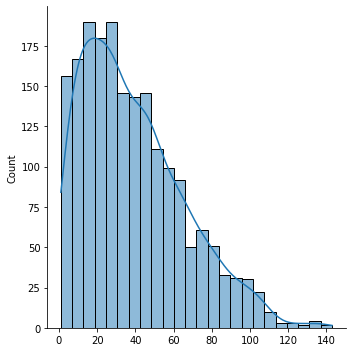

In [92]:
stat_info(messages_smart)

Пользователи тарифа Smart чаще всего используют около 34 смс-сообщений в месяц. Среднее составляет 38, дисперсия 717, стандартное отклонение 26.

Медиана 51.0
Среднее 61.161006289308176
Дисперсия 2107.0055235156838
Стандартное отклонение 45.90212983637779


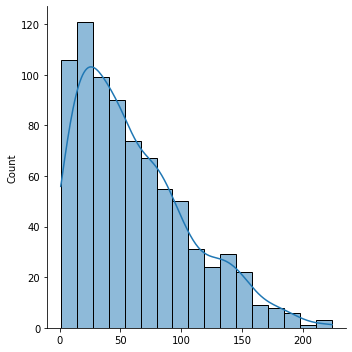

In [93]:
stat_info(messages_ultra)

Пользователи тарифа Ultra чаще всего используют около 51 смс-сообщение в месяц. Среднее составляет 61, дисперсия 2107, стандартное отклонение 45.

In [94]:
internet_smart = make_list(pivot_internet.query('tariff=="smart"').loc[:, 1:12])

In [95]:
internet_ultra = make_list(pivot_internet.query('tariff=="ultra"').loc[:, 1:12])

Медиана 16508.64
Среднее 16222.943242029636
Дисперсия 34241826.059556894
Стандартное отклонение 5851.651566827684


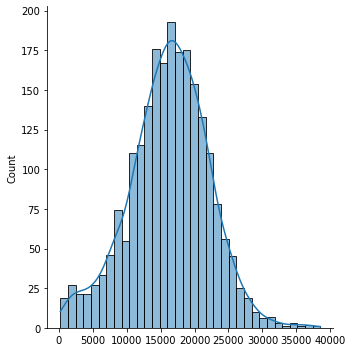

In [96]:
stat_info(internet_smart)

Пользователи тарифа Smart чаще всего используют около 16508 мб. интернет-трафика в месяц. Среднее составляет 16222, дисперсия 34241826, стандартное отклонение 5851.

Медиана 19409.025
Среднее 19688.678778234087
Дисперсия 98466665.28900848
Стандартное отклонение 9923.037100052004


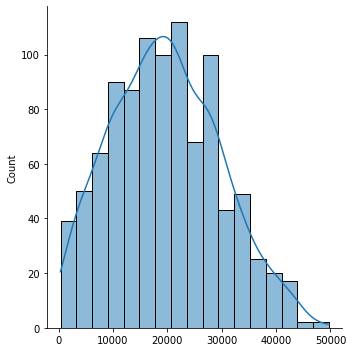

In [97]:
stat_info(internet_ultra)

Пользователи тарифа Ultra чаще всего используют около 19409 мб. интернет-трафика в месяц. Среднее составляет 19688, дисперсия 98466665, стандартное отклонение 9923.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Всё отлично. Еще на графиках можно изображать два распределения одного признака с разделением по заданному признаку(тариф). Тут есть примеры, обрати внимание на параметр hue. Но его применить к твоим таблицам не получится конечно из-за формы таблиц.https://seaborn.pydata.org/tutorial/categorical.html

Шаг 4. Проверьте гипотезы

Для проверки нижеуказанных гипотез необходимо применять проверку гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Так мы проверяем соответствие средних показателей всех пользователей определенных тарифов либо жителей определенных городов (генеральные совокупности) по предоставленным нам данным (выборкам).

Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются.

Альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [98]:
df_total_fee

,tariff,age,city,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,,,,
1000,ultra,52,Краснодар,0.00,0.00,0.00,0.00,"1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00"
1001,smart,41,Москва,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100.00",500.00
1002,smart,59,Стерлитамак,0.00,0.00,0.00,0.00,0.00,500.00,"1,100.00","1,500.00",900.00,500.00,"1,300.00","1,100.00"
1003,ultra,23,Москва,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,950.00","1,950.00","1,950.00","1,950.00","1,950.00"
1004,ultra,68,Новокузнецк,0.00,0.00,0.00,0.00,"1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00","1,950.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,65,Иркутск,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,950.00","2,400.00","1,950.00","3,300.00","1,950.00"
1496,smart,36,Вологда,500.00,"3,382.00","2,671.00","1,763.00","2,300.00","1,665.00","2,546.00","2,181.00","2,900.00","3,100.00","2,986.00","1,757.00"
1497,smart,32,Челябинск,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500.00,500.00,"1,635.00"


Создадим функцию, которая принимает датасет, а возвращает список значений датасета без 0. Нули необходимо убрать так как клиент не мог пользоваться услугами компании в тот месяц в которых не оплачивал абоненскую плату.

In [99]:
def make_list(df):
    list_value = []
    df_copy = df.copy()
    for i in df_copy.columns:
        list_1 = list(df_copy.loc[:, i])
        for k in range(0, len(list_1)):
            if list_1[k] > 0:
                list_value.append(list_1[k])
    return list_value

In [100]:
fee_smart = make_list(df_total_fee.query('tariff=="smart"').loc[:, 1:12])

In [101]:
fee_ultra = make_list(df_total_fee.query('tariff=="ultra"').loc[:, 1:12])

In [102]:
alpha = 0.05
results = st.ttest_ind(fee_smart, 
                       fee_ultra,
                       equal_var = False
                      )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.551166958312497e-277
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Нулевая гипотеза - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [103]:
fee_mos = make_list(df_total_fee.query('city=="Москва"').loc[:, 1:12]
                   )

In [104]:
fee_no_mos = make_list(df_total_fee.query('city!="Москва"').loc[:, 1:12]
                      )

In [105]:
alpha = 0.05
results = st.ttest_ind(fee_mos, 
                       fee_no_mos,
                      )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.47814645359169694
Не получилось отвергнуть нулевую гипотезу


Принимаем нулевую гипотезу - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Формулировка гипотез, проведение тестов, выводы из них - всё правильно.
    
</div>

Шаг 5. Напишите общий вывод

В ходе исследования установлено, что:  
- Пользователи тарифа Smart чаще всего используют 400 минут мобильной связи в месяц, отправляют 34 смс-сообщения, тратят 16.01 гб интернет-трафика в месяц, а в среднем 395 минут, 38 смс-сообщений, 15.8 гб. интернет-трафика в месяц соответственно.

- Пользователи тарифа Ultra чаще всего используют 500 минут мобильной связи в месяц, отправляют 34 смс-сообщения, тратят 18.9 гб интернет-трафика в месяц, а в среднем 514 минут, 61 смс-сообщений, 19.22 гб. интернет-трафика в месяц соответственно.

- Средняя выручка пользователей тарифов Smart и Ultra различаются. Средняя выручка пользователей из Москвы не отличается от пользователей из других населенных пунктов.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
    
Всё ок, но цель проекта была - Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Допиши какой тариф для компании по твоему мнению лучше

In [106]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div class="alert alert-info"> Из приведенных данных и без учета расходов на оборудование и инфраструктуру можно сделать вывод, что тариф ultra более прибылен. 
    Также следует рассмотреть вопрос о необходимости предложения пользователям тарифа smart, чьи месячные расходы более 1950 руб. перейти на тариф ultra, так как их потребности в услугах связи без значительных затрат поверх абонентской платы не могут быть удовлетворены в рамках текущего тарифа. Такие пользователи при самостоятельном поиске более выгодного предложения могут перейти к другому оператору связи.

 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера-2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Всё логично

<blockquote>

**Общий вывод по проекту**

Спасибо за твой проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец! Есть несколько важных моментов, которые я отметил и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях.

**Отмечу отдельные положительные моменты проекта**:

* На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
* Несмотря на не самый эффективный способ выполнения, всё сделано правильно=)
* На каждом шагу есть подробные выводы

**Что нужно исправить**
* Добавить округление звонков и интернет сессий
* Дописать выводы
* Остальные *рекомендации* ты найдешь выше
    
Если есть вопросы, я готов на них ответить.
    
Для будущего развития в плане визуализации советую обратить внимание на библиотеку seaborn - там графики получаются красивее =) и она содержит много разных видов визуализаций. Тут можно на русском посмотреть примеры кода и графиков 
https://nbviewer.org/urls/mipt-stats.gitlab.io/courses/python/09_seaborn.ipynb
    
**Желаю удачи и жду твой проект на повторное ревью!**
</blockquote>

<blockquote>

**Общий вывод по проекту-2**

Критичные ошибки исправлены, отправляю на повторное ревью, чтобы исправить ошибку во втором методе объединения данных.

Если у тебя скоро дедлайн и нужно побыстрее принять проект, то я его приму при следующей проверке

<blockquote>

**Общий вывод по проекту-3**

Ошибок больше нет, проект принят

**Удачи в дальнейшем обучении, у тебя всё получится!**